<h1><center>Policy Gradient</center></h1>

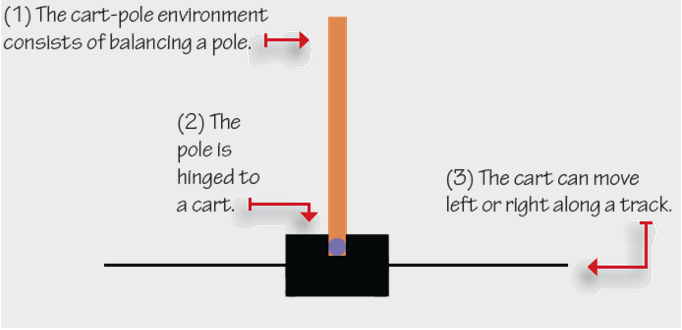

In [8]:
import numpy as np
import random
import gym
from collections import deque
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Add, Lambda
from keras.optimizers import Adam 
from keras import backend as K

EVIRONMENT_NAME = "CartPole-v1"

In [9]:
class Memory:
  def __init__(self):
       self.clear()

  def append(self, experience):
      self.buffer.append(experience)     

  def sample(self):
      return self.buffer
    
  def clear(self):
      self.buffer = []

In [10]:
class PolicyGradient_Agent:
    def __init__(self, env, discount_rate = 0.99, 
                 lr = 0.001, batch_size = 64):
        self.env = env
        self.state_size = env.observation_space.shape[0]
        self.discount_rate = discount_rate

        self.memory = Memory()

        self.model = self.create_model(lr, "PG")

    def load_model(self):
        self.model = load_model('cartPole-v1-PG-1.h5')
        
    def create_model(self, lr, name):
        
        inputs = Input(shape=(self.state_size,))
        fc1 = Dense(16, activation= 'relu', kernel_initializer= 'he_uniform')(inputs)
        fc2 = Dense(32, activation= 'relu', kernel_initializer= 'he_uniform')(fc1)
        
        #dimenstion of output layer is equat to dimesnion of action space 
        outputs = Dense(self.env.action_space.n, activation= 'softmax', kernel_initializer= 'he_uniform')(fc2)        
        
        model = Model(inputs= inputs, outputs= outputs, name= name)        
        
        #cross_entropy(Rtarget, probability) = - Rtarget * log(probability) 
        model.compile(loss= 'categorical_crossentropy', optimizer= Adam(lr = lr))        
        return model
        
    #greedy policy    
    def act(self, state):
        action_prob = self.model.predict(np.reshape(state,[1, self.state_size])).flatten()
        return np.random.choice(self.env.action_space.n, p=action_prob)
    
    def calc_discounted_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        
        #Gt = Rt+1 + 𝜸 Gt+1
        cumulative_discounted = 0.
        for index in reversed(range(0,len(rewards))):
            cumulative_discounted = self.discount_rate * cumulative_discounted + rewards[index]
            discounted_rewards[index] = cumulative_discounted
        
        return discounted_rewards                
    
    #Learn from one episode
    def learn(self):
        episode = self.memory.sample()
        states = [experience[0] for experience in episode]
        actions = [experience[1] for experience in episode]        
        rewards = [experience[2] for experience in episode]

        states = np.reshape(states, [len(episode), self.state_size])
        
        #Initialise advantage value of all actions to 0
        advantages = np.zeros((len(episode), self.env.action_space.n))
        
        discounted_rewards = self.calc_discounted_rewards(rewards)
        
        #set advatage targets forselected action 
        for t in range(0,len(states)):
            advantages[t][actions[t]] = discounted_rewards[t]
       
        self.model.fit(states, advantages, epochs=1, verbose=0) 
        self.memory.clear()

    def train(self, max_episodes):
        rewards = []

        for e in range(max_episodes):
            done = False
            episode_total = 0

            #start a new episode
            state = env.reset()

            while not done:
                 #get next action following policy 
                 action = self.act(state)
                 next_state, reward, done, info = env.step(action)
                 reward = reward if not done or episode_total == 499 else -100

                 self.memory.append((state, action, reward))                    
                 episode_total += reward
                 state = next_state
           
            self.learn() 
            episode_total = episode_total if episode_total == 500 else episode_total + 100
            rewards.append(episode_total)
            print("episode:", e, "  episode_total:", episode_total)
            
        self.model.save('cartPole-v1-PG-1.h5')     



In [4]:
env = gym.make(EVIRONMENT_NAME)
agent = PolicyGradient_Agent(env)
agent.train(1000)

episode: 0   episode_total: 9.0
episode: 1   episode_total: 12.0
episode: 2   episode_total: 9.0
episode: 3   episode_total: 13.0
episode: 4   episode_total: 9.0
episode: 5   episode_total: 9.0
episode: 6   episode_total: 12.0
episode: 7   episode_total: 15.0
episode: 8   episode_total: 10.0
episode: 9   episode_total: 19.0
episode: 10   episode_total: 55.0
episode: 11   episode_total: 42.0
episode: 12   episode_total: 39.0
episode: 13   episode_total: 16.0
episode: 14   episode_total: 14.0
episode: 15   episode_total: 18.0
episode: 16   episode_total: 13.0
episode: 17   episode_total: 13.0
episode: 18   episode_total: 10.0
episode: 19   episode_total: 21.0
episode: 20   episode_total: 65.0
episode: 21   episode_total: 18.0
episode: 22   episode_total: 10.0
episode: 23   episode_total: 19.0
episode: 24   episode_total: 21.0
episode: 25   episode_total: 16.0
episode: 26   episode_total: 13.0
episode: 27   episode_total: 17.0
episode: 28   episode_total: 29.0
episode: 29   episode_total:

episode: 248   episode_total: 18.0
episode: 249   episode_total: 20.0
episode: 250   episode_total: 52.0
episode: 251   episode_total: 38.0
episode: 252   episode_total: 13.0
episode: 253   episode_total: 16.0
episode: 254   episode_total: 21.0
episode: 255   episode_total: 16.0
episode: 256   episode_total: 8.0
episode: 257   episode_total: 29.0
episode: 258   episode_total: 25.0
episode: 259   episode_total: 22.0
episode: 260   episode_total: 20.0
episode: 261   episode_total: 21.0
episode: 262   episode_total: 18.0
episode: 263   episode_total: 9.0
episode: 264   episode_total: 9.0
episode: 265   episode_total: 31.0
episode: 266   episode_total: 16.0
episode: 267   episode_total: 40.0
episode: 268   episode_total: 25.0
episode: 269   episode_total: 41.0
episode: 270   episode_total: 21.0
episode: 271   episode_total: 22.0
episode: 272   episode_total: 34.0
episode: 273   episode_total: 15.0
episode: 274   episode_total: 39.0
episode: 275   episode_total: 25.0
episode: 276   episode_

episode: 491   episode_total: 72.0
episode: 492   episode_total: 43.0
episode: 493   episode_total: 15.0
episode: 494   episode_total: 44.0
episode: 495   episode_total: 33.0
episode: 496   episode_total: 106.0
episode: 497   episode_total: 35.0
episode: 498   episode_total: 71.0
episode: 499   episode_total: 37.0
episode: 500   episode_total: 12.0
episode: 501   episode_total: 33.0
episode: 502   episode_total: 31.0
episode: 503   episode_total: 31.0
episode: 504   episode_total: 35.0
episode: 505   episode_total: 10.0
episode: 506   episode_total: 23.0
episode: 507   episode_total: 53.0
episode: 508   episode_total: 37.0
episode: 509   episode_total: 39.0
episode: 510   episode_total: 36.0
episode: 511   episode_total: 25.0
episode: 512   episode_total: 19.0
episode: 513   episode_total: 39.0
episode: 514   episode_total: 20.0
episode: 515   episode_total: 32.0
episode: 516   episode_total: 38.0
episode: 517   episode_total: 38.0
episode: 518   episode_total: 103.0
episode: 519   epi

episode: 726   episode_total: 56.0
episode: 727   episode_total: 73.0
episode: 728   episode_total: 19.0
episode: 729   episode_total: 72.0
episode: 730   episode_total: 30.0
episode: 731   episode_total: 65.0
episode: 732   episode_total: 88.0
episode: 733   episode_total: 121.0
episode: 734   episode_total: 116.0
episode: 735   episode_total: 85.0
episode: 736   episode_total: 146.0
episode: 737   episode_total: 52.0
episode: 738   episode_total: 154.0
episode: 739   episode_total: 104.0
episode: 740   episode_total: 77.0
episode: 741   episode_total: 34.0
episode: 742   episode_total: 59.0
episode: 743   episode_total: 60.0
episode: 744   episode_total: 98.0
episode: 745   episode_total: 209.0
episode: 746   episode_total: 154.0
episode: 747   episode_total: 52.0
episode: 748   episode_total: 141.0
episode: 749   episode_total: 118.0
episode: 750   episode_total: 65.0
episode: 751   episode_total: 93.0
episode: 752   episode_total: 43.0
episode: 753   episode_total: 114.0
episode: 7

episode: 955   episode_total: 500.0
episode: 956   episode_total: 500.0
episode: 957   episode_total: 500.0
episode: 958   episode_total: 500.0
episode: 959   episode_total: 319.0
episode: 960   episode_total: 452.0
episode: 961   episode_total: 500.0
episode: 962   episode_total: 500.0
episode: 963   episode_total: 500.0
episode: 964   episode_total: 500.0
episode: 965   episode_total: 500.0
episode: 966   episode_total: 446.0
episode: 967   episode_total: 500.0
episode: 968   episode_total: 500.0
episode: 969   episode_total: 500.0
episode: 970   episode_total: 500.0
episode: 971   episode_total: 500.0
episode: 972   episode_total: 500.0
episode: 973   episode_total: 500.0
episode: 974   episode_total: 500.0
episode: 975   episode_total: 500.0
episode: 976   episode_total: 500.0
episode: 977   episode_total: 500.0
episode: 978   episode_total: 500.0
episode: 979   episode_total: 380.0
episode: 980   episode_total: 500.0
episode: 981   episode_total: 500.0
episode: 982   episode_total

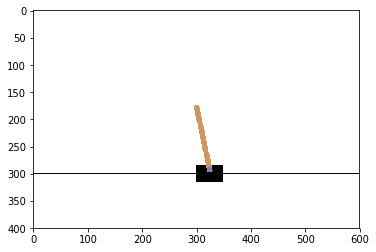

In [11]:
import gym
from IPython import display
import matplotlib.pyplot as plt
import time

%matplotlib inline

MAX_EPISODES = 10

env = gym.make(EVIRONMENT_NAME)
for episode in range(3):
    state = env.reset()
    done = False
    steps = 0
    rewards = 0
    while not done:
       plt.imshow(env.render(mode='rgb_array'))
       display.clear_output(wait=True)
       display.display(plt.gcf())
       _, reward, done, _ = env.step(env.action_space.sample())
       time.sleep(0.005)
       rewards+= reward 
    print('end of episode: %d score: %.2f'%(episode, rewards))
    time.sleep(3)
display.clear_output()    

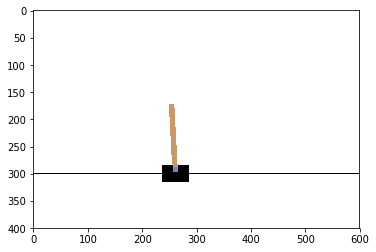

In [13]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
import time


env = gym.make(EVIRONMENT_NAME)
agent = PolicyGradient_Agent(env)
agent.load_model()

for episode in range(3):
    state = env.reset()
    done = False
    rewards = 0
    while not done and rewards < 500:
        plt.imshow(env.render(mode='rgb_array'))
        display.clear_output(wait=True)
        display.display(plt.gcf())
        action = agent.act(state)
        state, reward, done, _ = env.step(action)
        rewards+=1
        if rewards % 20 == 0:
           print('episode: %d score: %.2f'%(episode, rewards))
           time.sleep(1) 
    time.sleep(1)
display.clear_output()    